# Imports

In [1]:
import pandas as pd
import os

from dotenv import load_dotenv

# pandasai imports
from pandasai.llm.openai import OpenAI
from pandasai import SmartDataframe
from pandasai import clear_cache
from pandasai import Agent

# Initialization

In [2]:
READ_FROM_PICKLE = True

In [3]:
# finds .env file and loads the vars
load_dotenv()
openai_api_key = os.getenv("OPENAI_API_KEY", "Key not found")
openai_org = os.getenv("OPENAI_ORG", "Organization not found")

In [4]:
if READ_FROM_PICKLE:
    malicious_df = pd.read_pickle("data/malicious_features_numeric.pkl")
    benign_df = pd.read_pickle("data/benign_features_numeric.pkl")

In [5]:
# Instantiate a LLM
llm = OpenAI(api_token=openai_api_key)

In [6]:
malicious_smart = SmartDataframe(
    df=pd.DataFrame(malicious_df),
    config={"llm": llm, "verbose": True},
    name="Mirai botnet network packet capture.",
    description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.",
)

In [7]:
benign_smart = SmartDataframe(
    df=pd.DataFrame(benign_df),
    config={"llm": llm, "verbose": True},
    name="Packet capture of normal operation network travvid.",
    description="A dataframe that is derived from a packet capture of the regular operation of a network.",
)

In [8]:
malicious_smart.columns

Index(['Timestamp', 'Source Port', 'Destination Port', 'Payload',
       'Packet Length', 'Protocol', 'src_ip_total_bytes', 'dst_ip_total_bytes',
       'Numeric Source IP', 'Numeric Destination IP', 'dst_port_freq_encoded',
       'Interarrival'],
      dtype='object')

# EDA

## Statistical

### Exploration via prompting

In [9]:
top_5_source_IPs = malicious_smart.chat("Which are the 5 most popular source IP addresses?")

top_5_source_IPs

2024-05-13 20:35:24 [INFO] Question: Which are the 5 most popular source IP addresses?
2024-05-13 20:35:24 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:24 [INFO] Prompt ID: f3f16378-fd76-44f2-9af3-047848f58444
2024-05-13 20:35:24 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:24 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:24 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.04079434096956324,5.0067901611328125e-06
0149235833,2107

,Numeric Source IP,Count
0,3232236140,51747
1,3232236145,34415
2,3232236142,16520
3,3232236147,13486
4,3232236144,9158


In [10]:
print(malicious_smart.last_code_generated)

source_ip_counts = dfs[0]['Numeric Source IP'].value_counts().head(5).reset_index()
source_ip_counts.columns = ['Numeric Source IP', 'Count']
result = {'type': 'dataframe', 'value': source_ip_counts}


In [11]:
top_5_dst_ports = malicious_smart.chat("Find the most used destination ports.")
top_5_dst_ports

2024-05-13 20:35:28 [INFO] Question: Find the most used destination ports.
2024-05-13 20:35:28 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:28 [INFO] Prompt ID: df98cf48-5107-4257-a2fc-00b8af61e03e
2024-05-13 20:35:28 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:28 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:28 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.04079434096956324,5.0067901611328125e-06
0149235833,21074.0,80.0,Pad

10240.0

In [12]:
print(malicious_smart.last_code_generated)

most_used_ports = dfs[0]['Destination Port'].value_counts().idxmax()
result = {'type': 'number', 'value': most_used_ports}


### Prompt engineering

In [13]:
rare_ports = malicious_smart.chat(
    "Which are the most rarely used destination ports within the range of 0-1024?"
)
rare_ports

2024-05-13 20:35:29 [INFO] Question: Which are the most rarely used destination ports within the range of 0-1024?
2024-05-13 20:35:29 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:29 [INFO] Prompt ID: 2a8b9398-a732-4ad2-9419-8ef71ffe9bde
2024-05-13 20:35:29 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:29 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:29 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.04079434096956324,5.006790161

'The most rarely used destination ports within the range of 0-1024 are:\n137.0    15\nName: Destination Port, dtype: int64'

In [14]:
rare_ports = malicious_smart.chat(
    "Which are the most rarely used destination ports less than or equal to 1024?"
)
rare_ports

2024-05-13 20:35:33 [INFO] Question: Which are the most rarely used destination ports less than or equal to 1024?
2024-05-13 20:35:33 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:33 [INFO] Prompt ID: 33642061-4722-440f-afed-6d4bc4949b90
2024-05-13 20:35:33 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:33 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:33 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.04079434096956324,5.006790161

[80.0, 53.0, 443.0, 68.0, 67.0, 123.0, 138.0, 137.0, 23.0]

### Correlation

In [15]:
correlation = malicious_smart.chat(
    """1. Calculate the correlation between the source port and the length of a packet.
       2. Explain if the correlation that you calculated is significant and why.
    """
)
correlation

2024-05-13 20:35:36 [INFO] Question: 1. Calculate the correlation between the source port and the length of a packet.
       2. Explain if the correlation that you calculated is significant and why.
    
2024-05-13 20:35:36 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:36 [INFO] Prompt ID: d3e699e8-42bc-4b6d-a537-0e391ef88dcf
2024-05-13 20:35:36 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:36 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:36 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20

-0.16566431740345833

### Hypothesis testing

In [16]:
hypothesis = malicious_smart.chat(
    "Is the difference between dst_ip_total_bytes and Packet Length statistically significant?"
)
hypothesis

2024-05-13 20:35:39 [INFO] Question: Is the difference between dst_ip_total_bytes and Packet Length statistically significant?
2024-05-13 20:35:39 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:39 [INFO] Prompt ID: 0cb896ea-393a-464a-b464-76a6fb2644d3
2024-05-13 20:35:39 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:39 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:39 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.0407943409695632

'The difference between dst_ip_total_bytes and Packet Length is statistically significant.'

### Outliers

In [17]:
outliers = malicious_smart.chat(
    "Find the z score of the Packet Length and then calculate the top ten outliers."
)
outliers

2024-05-13 20:35:43 [INFO] Question: Find the z score of the Packet Length and then calculate the top ten outliers.
2024-05-13 20:35:43 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:43 [INFO] Prompt ID: 5b84ba64-63b3-4557-91f8-767ba29626a1
2024-05-13 20:35:43 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:43 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:43 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.04079434096956324,5.0067901

,Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival,Packet Length Z Score
581,1.540446e+09,1215.0,1900.0,Raw,166,17.0,2000,311,3232236147,4026531834,0.006827,0.107952,6.874131
582,1.540446e+09,1215.0,1900.0,Raw,166,17.0,2166,477,3232236147,4026531834,0.006827,0.000148,6.874131
583,1.540446e+09,1215.0,1900.0,Raw,166,17.0,2332,643,3232236147,4026531834,0.006827,0.000002,6.874131
1012,1.540446e+09,67.0,68.0,BOOTP,166,17.0,1791,166,3232236033,4294967295,0.000883,0.034520,6.874131
1351,1.540446e+09,1215.0,1900.0,Raw,166,17.0,5709,809,3232236147,4026531834,0.006827,0.083352,6.874131
1352,1.540446e+09,1215.0,1900.0,Raw,166,17.0,5875,975,3232236147,4026531834,0.006827,0.007626,6.874131
1353,1.540446e+09,1215.0,1900.0,Raw,166,17.0,6041,1141,3232236147,4026531834,0.006827,0.000676,6.874131
2257,1.540446e+09,1215.0,1900.0,Raw,166,17.0,9468,1597,3232236147,4026531834,0.006827,0.065097,6.874131
2258,1.540446e+09,1215.0,1900.0,Raw,166,17.0,9634,1763,3232236147,4026531834,0.006827,0.001044,6.874131
2259,1.540446e+09,1215.0,1900.0,Raw,166,17.0,9800,1929,3232236147,4026531834,0.006827,0.001050,6.874131


## Visualizations

2024-05-13 20:35:45 [INFO] Question: Plot the histogram of src_ip_total_bytes with purple color.
2024-05-13 20:35:45 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:45 [INFO] Prompt ID: b6a239f4-d2d4-40f6-9efe-caf201067bff
2024-05-13 20:35:46 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:46 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:46 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.04079434096956324,5.0067901611328125e-06
01492

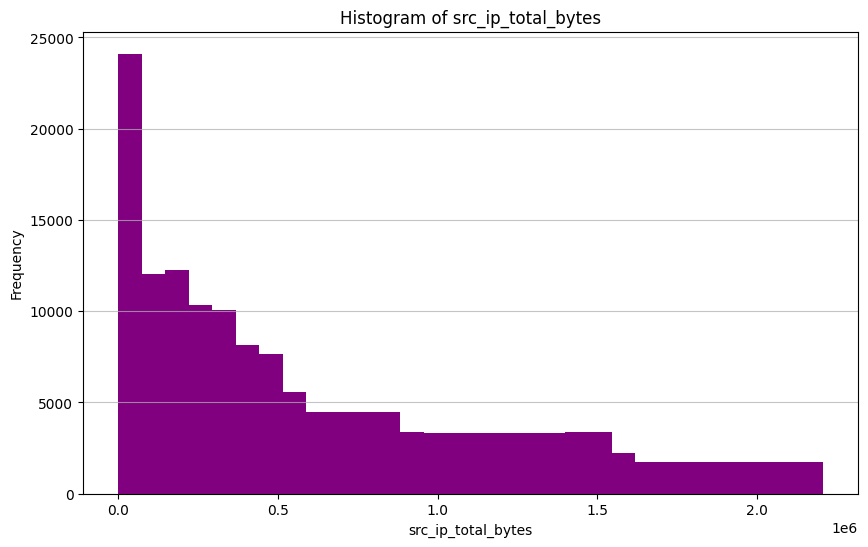

2024-05-13 20:35:49 [INFO] Executing Step 5: ResultValidation
2024-05-13 20:35:49 [INFO] Answer: {'type': 'plot', 'value': '/Users/polyxeni/sandbox/cyberdata-mlai/exports/charts/temp_chart.png'}
2024-05-13 20:35:49 [INFO] Executed in: 3.292346954345703s
2024-05-13 20:35:49 [INFO] Executing Step 6: ResultParsing


'/Users/polyxeni/sandbox/cyberdata-mlai/exports/charts/temp_chart.png'

In [18]:
malicious_smart.chat(
    "Plot the histogram of src_ip_total_bytes with purple color."
)

In [19]:
print(malicious_smart.last_code_executed)

plt.figure(figsize=(10, 6))
plt.hist(dfs[0]['src_ip_total_bytes'], color='purple', bins=30)
plt.title('Histogram of src_ip_total_bytes')
plt.xlabel('src_ip_total_bytes')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
result = {'type': 'plot', 'value': '/Users/polyxeni/sandbox/cyberdata-mlai/exports/charts/temp_chart.png'}


2024-05-13 20:35:49 [INFO] Question: Plot the histogram dst_port_freq_encoded.
2024-05-13 20:35:49 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:49 [INFO] Prompt ID: a7363a7d-6312-4318-a9c2-b2c9afba88d6
2024-05-13 20:35:49 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:49 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:49 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.04079434096956324,5.0067901611328125e-06
0149235833,21074.0,80.0

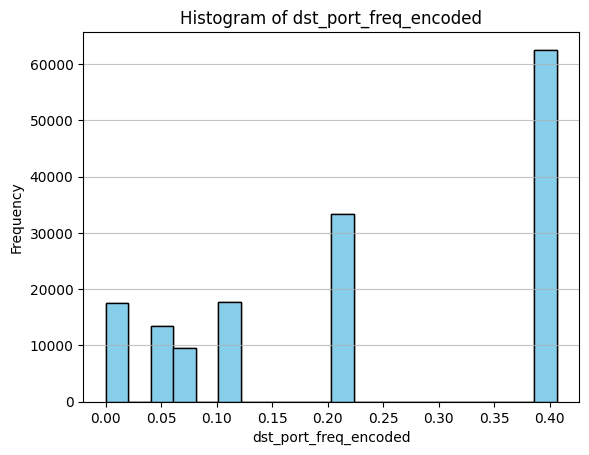

2024-05-13 20:35:53 [WARNING] Failed to execute code with a correction framework [retry number: 2]
2024-05-13 20:35:53 [ERROR] Failed with error: Traceback (most recent call last):
  File "/Users/polyxeni/sandbox/cyberdata-mlai/.venv/lib/python3.10/site-packages/pandasai/pipelines/smart_datalake_chat/code_execution.py", line 53, in execute
    result = pipeline_context.query_exec_tracker.execute_func(
  File "/Users/polyxeni/sandbox/cyberdata-mlai/.venv/lib/python3.10/site-packages/pandasai/helpers/query_exec_tracker.py", line 128, in execute_func
    result = function(*args, **kwargs)
  File "/Users/polyxeni/sandbox/cyberdata-mlai/.venv/lib/python3.10/site-packages/pandasai/helpers/code_manager.py", line 216, in execute_code
    raise NoResultFoundError("No result returned")
pandasai.exceptions.NoResultFoundError: No result returned
. Retrying
2024-05-13 20:35:53 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a

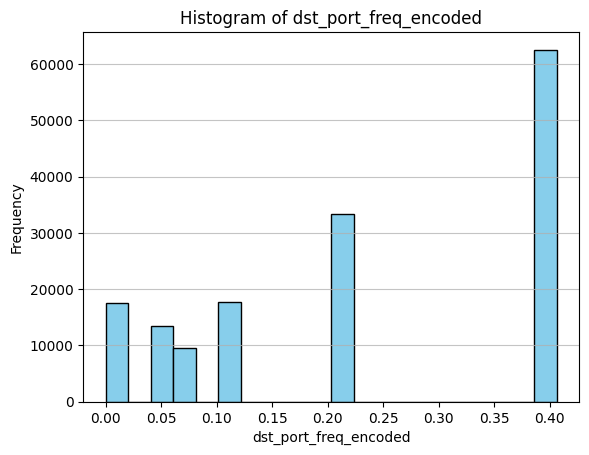

2024-05-13 20:35:55 [ERROR] Pipeline failed on step 4: No result returned


'Unfortunately, I was not able to answer your question, because of the following error:\n\nNo result returned\n'

In [20]:
malicious_smart.chat("Plot the histogram dst_port_freq_encoded.")

In [21]:
print(malicious_smart.last_code_executed)

plt.hist(dfs[0]['dst_port_freq_encoded'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('dst_port_freq_encoded')
plt.ylabel('Frequency')
plt.title('Histogram of dst_port_freq_encoded')
plt.grid(axis='y', alpha=0.75)
plt.show()


# Agents

In [22]:
from pandasai import Agent

In [23]:
agent = Agent(malicious_smart, config={"llm": llm},memory_size=1000)

In [24]:
agent.chat('Is this dataframe indicating malicious or benign network behavior?')

2024-05-13 20:35:55 [INFO] Question: Is this dataframe indicating malicious or benign network behavior?
2024-05-13 20:35:55 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:55 [INFO] Prompt ID: 41c6ab74-933a-4390-950a-c56c18fc642b
2024-05-13 20:35:56 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:56 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:56 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packet capture of the Mirai botnet network traffic.">
dfs[0]:154090x12
Timestamp,Source Port,Destination Port,Payload,Packet Length,Protocol,src_ip_total_bytes,dst_ip_total_bytes,Numeric Source IP,Numeric Destination IP,dst_port_freq_encoded,Interarrival
1726524985,2440.0,53.0,"DNS Qry ""b'xmpp.samsun...",83,17.0,83,83,5516539083,0132948781,0.21641897592316178,0.4577469825744629
1935954590,20532.0,8280.0,Padding...,26,6.0,52,26,8489237767,6343311124,0.04079434096956324,5.0067901611328125e-0

'The dataframe indicates malicious network behavior.'

In [25]:
agent.chat('The dataframe that you have been given is a packet capture of computer network traffic. It has numerical features that characterize the packets that have been observed in this network. A packet capture is malicious if it has too many requests to ports that are unusual. Usual ports are 23 for Telnet and 80 for HTTP. Is this packet capture malicious or benign?')

2024-05-13 20:35:59 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-05-13 20:35:59 [INFO] Check if the new message is related to the conversation: True
2024-05-13 20:35:59 [INFO] Question: The dataframe that you have been given is a packet capture of computer network traffic. It has numerical features that characterize the packets that have been observed in this network. A packet capture is malicious if it has too many requests to ports that are unusual. Usual ports are 23 for Telnet and 80 for HTTP. Is this packet capture malicious or benign?
2024-05-13 20:35:59 [INFO] Running PandasAI with openai LLM...
2024-05-13 20:35:59 [INFO] Prompt ID: 85c26517-f3c2-442a-8d92-4c622758bf7d
2024-05-13 20:35:59 [INFO] Executing Step 0: CacheLookup
2024-05-13 20:35:59 [INFO] Executing Step 1: PromptGeneration
2024-05-13 20:35:59 [INFO] Using prompt: <dataframe name="Mirai botnet network packet capture." description="A dataframe that is derived from a packe

'The dataframe indicates malicious network behavior.'

In [26]:
agent.explain()

2024-05-13 20:36:04 [INFO] HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2024-05-13 20:36:04 [INFO] Explanation:  I looked at the specific ports that are known to be used for malicious activity, such as 23, 2323, 48101, and 7547. Then, I checked if any of the network traffic in the dataframe was going to these ports. If there was traffic going to these ports, then I concluded that the network behavior is malicious. Otherwise, if there was no traffic to these ports, then I concluded that the network behavior is benign.
                


'I looked at the specific ports that are known to be used for malicious activity, such as 23, 2323, 48101, and 7547. Then, I checked if any of the network traffic in the dataframe was going to these ports. If there was traffic going to these ports, then I concluded that the network behavior is malicious. Otherwise, if there was no traffic to these ports, then I concluded that the network behavior is benign.'

# Clear cache

In [27]:
clear_cache()